<a href="https://colab.research.google.com/github/tieubavuongpm92/AI/blob/main/Nhandangtiengiay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

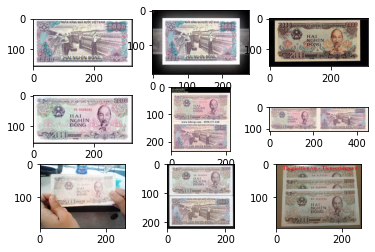

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Train/Tien_Giay_VN/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'2000dong.'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [9]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Train/Tien_Giay_VN/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('200dong'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500dong'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('1000dong'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2000dong'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5000dong'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10000dong'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20000dong'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50000dong'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100000dong'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('200000dong'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500000dong'):
    output = 10
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(110, 200, 200, 3) (110,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
 history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
4/4 [==============================] - 10s 2s/step - loss: 8250.8398 - accuracy: 0.1000
Epoch 2/50
4/4 [==============================] - 10s 2s/step - loss: 3915.6013 - accuracy: 0.0636
Epoch 3/50
4/4 [==============================] - 12s 3s/step - loss: 212.7181 - accuracy: 0.1636
Epoch 4/50
4/4 [==============================] - 8s 2s/step - loss: 40.5727 - accuracy: 0.4455
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 9.1571 - accuracy: 0.5727
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 3.3768 - accuracy: 0.7364
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 1.1487 - accuracy: 0.7091
Epoch 8/50
4/4 [==============================] - 8s 2s/step - loss: 0.7509 - accuracy: 0.8091
Epoch 9/50
4/4 [==============================] - 7s 2s/step - loss: 0.3376 - accuracy: 0.9182
Epoch 10/50
4/4 [==============================] - 7s 2s/step - loss: 0.1513 - accuracy: 0.9636
Epoch 11/50
4/4 [====================

In [12]:
model.evaluate(photos,labels)

4/4 [==============================] - 2s 478ms/step - loss: 6.9022e-05 - accuracy: 1.0000


[6.902237510075793e-05, 1.0]

In [13]:
model.save('11TienGiay_Final.h5')

In [14]:
from keras.models import load_model
models=load_model('11TienGiay_Final.h5')

In [15]:
classes = ["200dong","500dong","1000dong","2000dong","5000dong","10000dong","20000dong","50000dong","100000dong","200000dong","500000dong"]

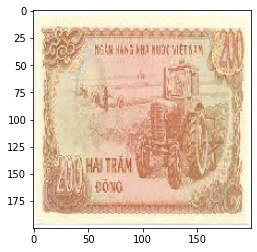

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Colab Notebooks/Train/Tien_Giay_VN/200dong.8.jpg', target_size=(200,200))
plt.imshow(img)

In [23]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.10466006 0.09141274 0.08705272 0.08750486 0.08660479 0.08798468
  0.08344064 0.09838274 0.08530122 0.09598771 0.09166781]]


'200dong'